<h1><center>EDA Analysis public data "Iowa liqour sales"</center></h1>

<p>Import additional libraries</p>

In [94]:
import pandas_gbq
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 40
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h2><em>1. Data Sourcing</em></h2>

<p>Load DataFrame from BigQuery public data and save to csv<p>

In [11]:
df = pandas_gbq.read_gbq('select * from bigquery-public-data.iowa_liquor_sales.sales', project_id='smarttender-273707')

Downloading: 100%|██████████| 20349538/20349538 [1:12:07<00:00, 4702.71rows/s]


In [ ]:
df.to_csv(r'C:\Users\semeniuk\Desktop\Cases\Case_Softconstruct\dataset.csv')

In [2]:
df = pd.read_csv(r'C:\Users\semeniuk\Desktop\Cases\Case_Softconstruct\dataset.csv')

C:\Users\semeniuk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-03082000091,2017-02-03,3443,Super Saver Iv,1141 N Broadway,Council Bluffs,51503,POINT (-95.836515 41.270824),78.000,POTTAWATTA,1062500.000,Flavored Rum,370.000,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1750,16.490,24.740,6,148.440,10.500,2.770
1,INV-32301500018,2020-11-30,5869,Tobacco Outlet Plus #507 - Urbandale,6941 Douglas Ave,Urbandale,50322,POINT (-93.711504 41.629416),77.000,POLK,1062500.000,Flavored Rum,35.000,BACARDI USA INC,43138,Bacardi Limon,6,1750,15.000,22.500,6,135.000,10.500,2.770
2,INV-17059300006,2019-01-22,5326,Als Liquor,215 W. Milwaukee Ave,Storm Lake,50588,POINT (-95.202405 42.647492),11.000,BUENA VIST,1062500.000,Flavored Rum,35.000,BACARDI USA INC,43138,Bacardi Limon,6,1750,15.000,22.500,6,135.000,10.500,2.770
3,INV-29255800079,2020-08-05,3443,Super Saver Iv,1141 N Broadway,Council Bluffs,51503,POINT (-95.836515 41.270824),78.000,POTTAWATTA,1062500.000,Flavored Rum,370.000,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1750,16.990,25.490,6,152.940,10.500,2.770
4,INV-20691000018,2019-07-17,4239,Fareway Stores #850 / Spirit Lake,1906 Keokuk,Spirit Lake,51360,POINT (-95.106219 43.42157),30.000,DICKINSON,1062500.000,Flavored Rum,370.000,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1750,16.990,25.490,6,148.440,10.500,2.770


<h2><em>2. Data Cleaning</em></h2>

<h2><ul><li><strong>Missing values</strong></li></ul></h2>

In [5]:
df.isnull().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      79927
city                         79926
zip_code                     79971
store_location             1951877
county_number               156731
county                      156729
category                     16974
category_name                25040
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost               10
state_bottle_retail             10
bottles_sold                     0
sale_dollars                    10
volume_sold_liters               0
volume_sold_gallons              0
dtype: int64

For all categorical string column apply lowercase and title functions to make the same register.

In [6]:
df['store_name'] = df['store_name'].apply(lambda x: x.lower().title() if type(x) == str else x)
df['address'] = df['address'].apply(lambda x: x.lower().title() if type(x) == str else x)
df['city'] = df['city'].apply(lambda x: x.lower().title() if type(x) == str else x)
df['county'] = df['county'].apply(lambda x: x.lower().title() if type(x) == str else x)
df['category_name'] = df['category_name'].apply(lambda x: x.lower().title() if type(x) == str else x)
df['vendor_name'] = df['vendor_name'].apply(lambda x: x.lower().upper() if type(x) == str else x)
df['item_description'] = df['item_description'].apply(lambda x: x.lower().title() if type(x) == str else x)

<p>As we can see, probably 6 fields(address, city, zip_code, store_location, county_number, county) can be filled based on store_number. Check this hypothesis</p>

<h3 style="margin-left: 50px;"><em>a). Analysis store_name and store_location</em></h3>

<p>For the first, check one-to-one relation for columns "store_number" and "store_name"</p>

In [7]:
print(df[['store_number', 'store_name']].drop_duplicates().shape)
print(df[['store_number']].drop_duplicates().shape)

(2768, 2)
(2521, 1)


It means that one store_number may have several store_name. 
Okay, then check reverse relations.

In [8]:
df.groupby('store_name').agg({'store_number': 'nunique'}).reset_index().sort_values(by='store_number', ascending=False)

,store_name,store_number
2430,Urban Liquor,3
1212,Heartland Market,3
2109,Rolfe Area Market,3
2146,Sauce,3
1908,New Star / Fort Dodge,3
...,...,...
889,Dahl'S / Johnston,1
890,Dahl'S / Merle Hay,1
891,Dahl'S / Wdm,1
892,Dahl'S Foods / Ames,1


In [9]:
df[df['store_name'] == 'Urban Liquor'].head(2)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1075,S10479300051,2013-02-07,4614,Urban Liquor,6401 Douglas Ave Ste 1,Urbandale,50322,POINT (-93.705732 41.629411),77.000,Polk,1031080.000,Vodka 80 Proof,260.000,DIAGEO AMERICAS,37418,Popov Vodka 80 Prf,6,1750,8.490,12.740,6,76.440,10.500,2.770
3580,S21810400006,2014-10-15,4939,Urban Liquor,6401 Douglas Ave Ste 1,Urbandale,50322,POINT (-93.705732 41.629411),77.000,Polk,1031080.000,Vodka 80 Proof,260.000,DIAGEO AMERICAS,38008,Smirnoff Vodka 80 Prf Pet,6,1750,14.750,22.130,2,44.260,3.500,0.920


As expected, store_name we must use carefully in our conclusions and split by store_number.

<h3 style="margin-left: 50px;"><em>b). Analysis city</em></h3>

Fill n/a city values based on store_number because it's unique.<br>
For the first, check if the same shops have different city name.

In [10]:
df.groupby('store_number').agg({'city': 'nunique'}).reset_index().\
                sort_values(by='city', ascending=False).query('city > 1').drop(columns='city').\
                merge(df[['store_number', 'city']].drop_duplicates()[df['city'].notnull()], on='store_number', how='left')

<ipython-input-10-8852135ee217>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge(df[['store_number', 'city']].drop_duplicates()[df['city'].notnull()], on='store_number', how='left')


,store_number,city
0,3782,Guttenberg
1,3782,Guttenburg
2,2543,Ottuwma
3,2543,Ottumwa
4,4668,Clear Lake
5,4668,Clearlake
6,3456,Clear Lake
7,3456,Clearlake
8,3822,Swisher
9,3822,Shueyville


As we can see, store '3822' and store '9911' have different city. Google it. Store '3822' located in Shueyville but store '9911' has the different adress into the different city. Fill n/a 50 rows randomly.

In [11]:
df['store_number'] = df['store_number'].astype('str')

In [12]:
#For store #3822
df.loc[df['store_number'] == '3822', 'city'] = 'Shueyville'
#For store #9911
df.loc[(df['store_number'] == '9911')&(df['city'].isnull()), 'city'] =\
                    df.loc[(df['store_number'] == '9911')&(df['city'].isnull()), 'city'].\
                    apply(lambda x: np.random.choice(['Grimes', 'Urbandale']))

For the next, manually find mistake similar <em>'Guttenberg'</em> and <em>'Guttenburg'</em> based on same name and Zip_code.

In [13]:
df.loc[df['city'] == "Arnold'S Park",'city'] = df.loc[df['city'] == "Arnold'S Park",'city'].\
                                                         apply(lambda x: 'Arnolds Park')
df.loc[df['city'] == "Clearlake",'city'] = df.loc[df['city'] == "Clearlake",'city'].apply(lambda x: 'Clear Lake')
df.loc[df['city'] == "Fort Atkinson",'city'] = df.loc[df['city'] == "Fort Atkinson",'city'].apply(lambda x: 'Ft. Atkinson')
df.loc[df['city'] == "Grand Mounds",'city'] = df.loc[df['city'] == "Grand Mounds",'city'].apply(lambda x: 'Grand Mound')
df.loc[df['city'] == "Guttenburg",'city'] = df.loc[df['city'] == "Guttenburg",'city'].apply(lambda x: 'Guttenberg')
df.loc[df['city'] == "Leclaire",'city'] = df.loc[df['city'] == "Leclaire",'city'].apply(lambda x: 'Le Claire')
df.loc[df['city'] == "Lemars",'city'] = df.loc[df['city'] == "Lemars",'city'].apply(lambda x: 'Le Mars')
df.loc[df['city'] == "Mount Pleasant",'city'] = df.loc[df['city'] == "Mount Pleasant",'city'].apply(lambda x: 'Mt Pleasant')
df.loc[df['city'] == "Mount Vernon",'city'] = df.loc[df['city'] == "Mount Vernon",'city'].apply(lambda x: 'Mt Vernon')
df.loc[df['city'] == "Otumwa",'city'] = df.loc[df['city'] == "Otumwa",'city'].apply(lambda x: 'Ottumwa')
df.loc[df['city'] == "Ottuwma",'city'] = df.loc[df['city'] == "Ottuwma",'city'].apply(lambda x: 'Ottumwa')
df.loc[df['city'] == "Saint Ansgar",'city'] = df.loc[df['city'] == "Saint Ansgar",'city'].apply(lambda x: 'St Ansgar')

<strong>Split table df into two batches: with null city and not null. Create table from batch with not null city and use table as dictionary for table with null city. Fill n/a value and concat two batches.</strong>

In [118]:
df_store_num_city = df[['store_number', 'city']][df['city'].notnull()].drop_duplicates().reset_index(drop=True)

df_isnull = df.loc[df['city'].isnull()]
print(df_isnull.shape)
df_notnull = df.loc[~df['city'].isnull()]

df_isnull = df_isnull.drop(columns='city')

df_isnull = df_isnull.merge(df_store_num_city, how='left', on='store_number')
print(df_isnull.shape)

df_filled = pd.concat([df_notnull, df_isnull])

(78420, 24)
(78420, 24)


In [119]:
df_filled[df_filled['city'].isnull()][['store_number']].groupby('store_number').agg({'store_number': 'nunique'})

,store_number
store_number,
5320,1


Drop this store, because we haven't valuable information by this invoices

In [120]:
df_filled = df_filled[df_filled['store_number'] != '5320']
df_filled = df_filled.reset_index(drop=True)

In [121]:
df_filled['city'].isnull().sum()

0

<h3 style="margin-left: 50px;"><em>c). Fillna address and zip_code</em></h3>

In [122]:
df_store_num_city_address = df_filled[['store_number', 'city', 'address']][df_filled['address'].notnull()].\
                                        drop_duplicates(subset=['store_number', 'city'], keep='first').reset_index(drop=True)

df_isnull = df_filled.loc[df_filled['address'].isnull()]
print(df_isnull.shape)
df_notnull = df_filled.loc[~df_filled['address'].isnull()]

df_isnull = df_isnull.drop(columns='address')

df_isnull = df_isnull.merge(df_store_num_city_address, how='left', on=['store_number', 'city'])
print(df_isnull.shape)

df_filled = pd.concat([df_notnull, df_isnull])

(79080, 24)
(79080, 24)


In [123]:
df_filled['address'].isnull().sum()

1

In [124]:
df_filled[df_filled['address'].isnull()]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
499,INV-05674000001,2017-06-22,9932,"3-Oaks Distillery, Llc",NaN,Dubuque,52002,POINT (-90.766335 42.516027),31.000,Dubuque,1011100.000,Blended Whiskies,215.000,"3-OAKS DISTILLERY, LLC",27890,3-Oaks Distillery Whiskey,12,750,21.600,32.400,1,388.800,0.750,0.190


In [125]:
df_filled.loc[df_filled['store_number'] == '9932', 'address'] = 'address_9932'

--------

In [126]:
df_store_num_city_zip = df_filled[['store_number', 'city', 'zip_code']][df_filled['zip_code'].notnull()].\
                                        drop_duplicates(subset=['store_number', 'city'], keep='first').reset_index(drop=True)

df_isnull = df_filled.loc[df_filled['zip_code'].isnull()]
print(df_isnull.shape)
df_notnull = df_filled.loc[~df_filled['zip_code'].isnull()]

df_isnull = df_isnull.drop(columns='zip_code')

df_isnull = df_isnull.merge(df_store_num_city_zip, how='left', on=['store_number', 'city'])
print(df_isnull.shape)

df_filled = pd.concat([df_notnull, df_isnull])

(79124, 24)
(79124, 24)


In [127]:
df_filled['zip_code'].isnull().sum()

0

<h3 style="margin-left: 50px;"><em>d). Fillna county and county_number</em></h3>

Because county and county_number very valuable values, analyze naming of county.

In [128]:
df_filled.groupby('store_number').agg({'county': 'nunique'}).reset_index().\
                sort_values(by='county', ascending=False).query('county > 1').drop(columns='county').\
                merge(df_filled[df_filled['county'].notnull()][['store_number', 'county']].\
                drop_duplicates(), on='store_number', how='left')

,store_number,county
0,4867,Pottawattamie
1,4867,Pottawatta
2,4312,Pottawattamie
3,4312,Pottawatta
4,4982,Buena Vist
...,...,...
181,3629,Pottawattamie
182,5182,Pottawatta
183,5182,Pottawattamie
184,2290,Buena Vista


As we can see, many county value have similar name but not the same, fix it.

In [129]:
df_filled.loc[df_filled['county'] == "Cerro Gord", 'county'] = \
                df_filled.loc[df_filled['county'] == "Cerro Gord", 'county'].apply(lambda x: 'Cerro Gordo')
df_filled.loc[df_filled['county'] == "Pottawatta", 'county'] = \
                df_filled.loc[df_filled['county'] == "Pottawatta", 'county'].apply(lambda x: 'Pottawattamie')
df_filled.loc[df_filled['county'] == "Buena Vist", 'county'] = \
                df_filled.loc[df_filled['county'] == "Buena Vist", 'county'].apply(lambda x: 'Buena Vista')
df_filled.loc[df_filled['county'] == "Obrien", 'county'] = \
                df_filled.loc[df_filled['county'] == "Obrien", 'county'].apply(lambda x: "O'Brien")

In [130]:
df_county = df_filled[(df_filled['county'].notnull())&(df_filled['county_number'].notnull())].\
                groupby(['store_number', 'city', 'county', 'county_number']).\
                agg({'store_name': 'count'}).sort_values(by='store_name', ascending=False).reset_index()
df_county = df_county.drop_duplicates(subset=['store_number', 'city'], keep='first').reset_index(drop=True)
df_county = df_county.drop(columns='store_name')

In [131]:
df_isnull = df_filled.loc[(df_filled['county'].isnull())|(df_filled['county_number'].isnull())]
print(df_isnull.shape)
df_notnull = df_filled.loc[~((df_filled['county'].isnull())|(df_filled['county_number'].isnull()))]

df_isnull = df_isnull.drop(columns=['county', 'county_number'])

df_isnull = df_isnull.merge(df_county, how='left', on=['store_number', 'city'])
print(df_isnull.shape)

df_filled = pd.concat([df_notnull, df_isnull])

(155884, 24)
(155884, 24)


In [132]:
df_filled[df_filled['county'].isnull()].\
            groupby(['store_number', 'address', 'city', 'store_name']).agg({'store_number': 'nunique'})

,,,,store_number
store_number,address,city,store_name,
5220,"2771, 4Th St Sw",Mason City,Liquor Tobacco & Grocery / Mason Cit,1
9936,1685 W Uintah St. #101,Colorado Springs,Dash Events Llc,1


Google it, and fill.

In [133]:
df_filled.loc[df_filled['store_number'] == '5220', 'county'] = 'Cerro Gordo'
df_filled.loc[df_filled['store_number'] == '5220', 'county_number'] = '17'

# And Colorado Springs not in IOWA, drop this rows.
df_filled = df_filled[df_filled['city'] != 'Colorado Springs']

In [134]:
print(df_filled['county'].isnull().sum())
print(df_filled['county_number'].isnull().sum())

0
0


In [135]:
# New shape
df_filled.shape

(20348689, 24)

<h3 style="margin-left: 50px;"><em>d). Fillna store_location</em></h3>

<strong>Location is a quantitative feature so we must fill cells as much as possible.</strong>

In [136]:
df_store_location = df_filled[df_filled['store_location'].notnull()]\
                        [['store_number', 'city', 'county', 'store_location']].drop_duplicates().reset_index()

In [137]:
df_store_location['store_location_x'] = df_store_location['store_location'].apply(lambda x: x[7:-1].split(' ')[0])
df_store_location['store_location_y'] = df_store_location['store_location'].apply(lambda x: x[7:-1].split(' ')[1])
df_store_location['store_location_x'] = df_store_location['store_location_x'].astype('float')
df_store_location['store_location_y'] = df_store_location['store_location_y'].astype('float')

Check outliers

In [138]:
df_store_location[df_store_location['store_location_x'] > \
                  df_store_location['store_location_x'].mean() + 3 * df_store_location['store_location_x'].std()]

,index,store_number,city,county,store_location,store_location_x,store_location_y
2229,165243,5876,West Bend,Palo Alto,POINT (-73.982421 40.305231000000006),-73.982,40.305


In [139]:
df_store_location[df_store_location['store_location_y'] > \
                  df_store_location['store_location_y'].mean() + 3 * df_store_location['store_location_y'].std()]

,index,store_number,city,county,store_location,store_location_x,store_location_y
1235,6472,4722,Burlington,Des Moines,POINT (-95.79728 45.009612),-95.797,45.010


Google real coordinates and change values.

In [140]:
df_filled.loc[df_filled['store_number'] == '5876', 'store_location'] = 'POINT (-94.445100 42.960000)'
df_filled.loc[df_filled['store_number'] == '4722', 'store_location'] = 'POINT (-91.112900 40.807700)'

In [141]:
df_store_location = df_filled[df_filled['store_location'].notnull()]\
                        [['store_number', 'city', 'county', 'store_location']].drop_duplicates().reset_index(drop=True)
df_store_location['store_location_x'] = df_store_location['store_location'].apply(lambda x: x[7:-1].split(' ')[0])
df_store_location['store_location_y'] = df_store_location['store_location'].apply(lambda x: x[7:-1].split(' ')[1])
df_store_location['store_location_x'] = df_store_location['store_location_x'].astype('float')
df_store_location['store_location_y'] = df_store_location['store_location_y'].astype('float')

In [142]:
df_isnull = df_filled.loc[(df_filled['store_location'].isnull())]
df_notnull = df_filled.loc[~(df_filled['store_location'].isnull())]

In [143]:
df_isnull.shape

(1951030, 24)

Join nulled by store_num. If we can see nulled field again then join by avg by city else join by avg by county

In [144]:
df_store_location_by_store = df_store_location[['store_number', 'city', 'store_location']].\
                            drop_duplicates(subset=['store_number', 'city'], keep='first')
df_isnull = df_isnull.drop(columns='store_location').\
                            merge(df_store_location_by_store, on=['store_number', 'city'], how='left')
print(df_isnull.shape)
df_isnull_container = df_isnull.loc[~(df_isnull['store_location'].isnull())]

(1951030, 24)


In [145]:
df_isnull = df_isnull.loc[(df_isnull['store_location'].isnull())]
df_isnull.shape

(1758555, 24)

In [146]:
df_store_location_by_city = df_store_location[['city', 'store_location_x', 'store_location_y']].\
                            groupby('city').agg({'store_location_x': 'mean', 'store_location_y': 'mean'}).reset_index()
df_store_location_by_city['store_location_x'] = df_store_location_by_city['store_location_x'].astype('str')
df_store_location_by_city['store_location_y'] = df_store_location_by_city['store_location_y'].astype('str')
df_store_location_by_city['store_location'] = df_store_location_by_city[['store_location_x', 'store_location_y']].\
                                        agg(' '.join, axis=1).apply(lambda x: 'POINT ('+x+')')
df_store_location_by_city = df_store_location_by_city.drop(columns=['store_location_x', 'store_location_y'])
df_isnull = df_isnull.drop(columns='store_location').\
                            merge(df_store_location_by_city, on=['city'], how='left')
print(df_isnull.shape)
df_isnull_container = pd.concat([df_isnull_container, df_isnull.loc[~(df_isnull['store_location'].isnull())]])

(1758555, 24)


In [147]:
df_isnull = df_isnull.loc[(df_isnull['store_location'].isnull())]
df_isnull.shape

(14654, 24)

In [148]:
store_location = \
   'POINT (' + str(df_store_location['store_location_x'].mean()) +' '+ str(df_store_location['store_location_y'].mean()) +')'
df_isnull['store_location'] = store_location
df_isnull_container = pd.concat([df_isnull_container, df_isnull])

In [149]:
print(df_isnull_container.shape)
df_filled = pd.concat([df_notnull, df_isnull_container])
print(df_filled.shape)

(1951030, 24)
(20348689, 24)


In [150]:
print(df_filled['store_location'].isnull().sum())

0


In [151]:
df_filled = df_filled.reset_index(drop=True)

<h3 style="margin-left: 50px;"><em>e). Fillna vendor_number and vendor_name</em></h3>

In [152]:
df_filled[['vendor_number', 'vendor_name', 'item_number', 'item_description']]\
            [(df_filled['vendor_number'].isnull())|(df_filled['vendor_name'].isnull())]

,vendor_number,vendor_name,item_number,item_description
654606,nan,RESERVOIR DISTILLERY,927565,Reservoir Wheat Whiskey
5104885,nan,NaN,973449,Dekuyper Blood Orange
8313089,nan,NaN,910621,Canadian Club Whisky Mini
16204295,nan,NaN,984151,99 Oranges
16708893,nan,RESERVOIR DISTILLERY,916456,Reservoir Bourbon Whiskey


In [153]:
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == 'Reservoir Wheat Whiskey'),\
                                                         'vendor_number'] = '286.0'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == 'Dekuyper Blood Orange'),\
                                                         'vendor_number'] = '309.0'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == 'Dekuyper Blood Orange'),\
                                                         'vendor_name'] = 'Dekuyper'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == 'Canadian Club Whisky Mini'),\
                                                         'vendor_number'] = '65.0'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == 'Canadian Club Whisky Mini'),\
                                                         'vendor_name'] = 'JIM BEAM BRANDS'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == '99 Oranges'),\
                                                         'vendor_number'] = '55.0'
df_filled.loc[(df_filled['vendor_number'].isnull())|(df_filled['item_description'] == '99 Oranges'),\
                                                         'vendor_name'] = 'SAZERAC NORTH AMERICA'

In [154]:
df_filled = df_filled.reset_index(drop=True)

<h3 style="margin-left: 50px;"><em>f). Fillna category and category_name</em></h3>

In [155]:
df_isnull = df_filled.loc[(df_filled['category'].isnull())|(df_filled['category_name'].isnull())]
df_notnull = df_filled.loc[~((df_filled['category'].isnull())|(df_filled['category_name'].isnull()))]

In [156]:
df_category = df_notnull[['item_description', 'category', 'category_name']].\
                        drop_duplicates(subset=['item_description'], keep='first')
df_isnull = df_isnull.drop(columns=['category', 'category_name']).merge(df_category, how='left', on=['item_description'])

Fill remaining categories as '-'

In [157]:
df_isnull['category'] = df_isnull['category'].fillna('-')
df_isnull['category_name'] = df_isnull['category_name'].fillna('-')

In [158]:
df_filled = pd.concat([df_notnull, df_isnull])

In [159]:
df_filled = df_filled.reset_index(drop=True)

<h3 style="margin-left: 50px;"><em>g). Fillna state_bottle_cost, state_bottle_retail, sale_dollars</em></h3>

In [160]:
df_isnull = df_filled.loc[((df_filled['state_bottle_cost'].isnull())|\
              (df_filled['state_bottle_retail'].isnull())|(df_filled['sale_dollars'].isnull()))]
df_notnull = df_filled.loc[~((df_filled['state_bottle_cost'].isnull())|\
              (df_filled['state_bottle_retail'].isnull())|(df_filled['sale_dollars'].isnull()))]

In [161]:
df_bottle_cost = df_notnull[['item_description', 'store_number', 'state_bottle_cost', 'state_bottle_retail']].\
                        drop_duplicates(subset=['item_description', 'store_number'], keep='first')

In [162]:
df_isnull = df_isnull.drop(columns=['state_bottle_cost', 'state_bottle_retail']).\
                merge(df_bottle_cost, on=['item_description', 'store_number'], how='left')
df_isnull['state_bottle_cost'] = df_isnull['state_bottle_cost'].fillna(12.8)
df_isnull['state_bottle_retail'] = df_isnull['state_bottle_cost'].fillna(19.2)
df_isnull['sale_dollars'] = df_isnull['state_bottle_retail'] * df_isnull['bottles_sold']

In [163]:
df_filled = pd.concat([df_notnull, df_isnull])
df_filled = df_filled.reset_index(drop=True)

In [164]:
df_filled.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

<h3 style="color: IndianRed"><em><strong>Conclusions: 
    <ul>
        <li>Dropped only two rows, beacause they didn't belong to the IOWA and only 847 without valuable informations</li>
        <li>Well filled numerical variables and city</li>
        <li>Store locations cleared of anomalies</li>
        <li>Fixed some string mistakes county and this enables us to do analytics in the context county</li>
    </ul>
</strong></em></h3>

<h2><ul><li><strong>Anomalies/Outliers</strong></li></ul></h2>

<h3 style="margin-left: 50px;"><em>a). Change all column with avaluable numeric information to date, float or int types</em></h3>

In [165]:
df_filled['date'] = pd.to_datetime(df_filled['date'])
df_filled['county_number'] = df_filled['county_number'].astype('int')
df_filled['store_location_W'] = df_filled['store_location'].apply(lambda x: float(x[7:-1].split(' ')[0]))
df_filled['store_location_N'] = df_filled['store_location'].apply(lambda x: float(x[7:-1].split(' ')[1]))
df_filled['pack'] = df_filled['pack'].astype('int')
df_filled['bottle_volume_ml'] = df_filled['bottle_volume_ml'].astype('int')
df_filled['state_bottle_cost'] = df_filled['state_bottle_cost'].astype('float')
df_filled['state_bottle_retail'] = df_filled['state_bottle_retail'].astype('float')
df_filled['bottles_sold'] = df_filled['bottles_sold'].astype('float')
df_filled['sale_dollars'] = df_filled['sale_dollars'].astype('float')
df_filled['volume_sold_liters'] = df_filled['volume_sold_liters'].astype('float')
df_filled['volume_sold_gallons'] = df_filled['volume_sold_gallons'].astype('float')

In a zip_code we have "invalid literal for int() with base 10: '712-2'". Fix it with google

In [166]:
df_filled.loc[df_filled['zip_code'] == '712-2', 'zip_code'] = '51529'
df_filled['zip_code'] = df_filled['zip_code'].astype('int')

<h3 style="margin-left: 50px;"><em>b). Describe table and check nulled values </em></h3>

In [167]:
df_filled.describe()

,zip_code,county_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_location_W,store_location_N
count,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000
mean,51265.876,57.306,12.269,908.884,9.975,14.977,10.363,135.747,9.136,2.412,-93.016,41.955
std,988.952,27.279,7.677,660.432,10.717,16.075,28.086,469.729,33.815,8.933,1.632,0.638
min,50002.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-96.563,40.394
25%,50316.000,31.000,6.000,750.000,5.500,8.250,3.000,31.500,1.500,0.400,-93.790,41.562
50%,51101.000,62.000,12.000,750.000,8.250,12.370,6.000,72.000,5.000,1.320,-93.202,41.764
75%,52303.000,77.000,12.000,1000.000,12.070,18.120,12.000,140.640,10.500,2.770,-91.631,42.488
max,57222.000,99.000,336.000,378000.000,7680.000,11520.000,15000.000,279557.280,15000.000,3962.580,-90.182,43.491


Fix some mistakes

In [168]:
df_isnull = df_filled.loc[df_filled['bottle_volume_ml'] == 0]
print(df_isnull.shape)
df_notnull = df_filled.loc[~(df_filled['bottle_volume_ml'] == 0)]

df_isnull = df_isnull.drop(columns='bottle_volume_ml').\
                merge(df_filled[['item_description', 'bottle_volume_ml']].\
                      drop_duplicates(subset='item_description', keep='first'), how='left', on='item_description')
median_bottle_volume = df_filled['bottle_volume_ml'].median()
df_isnull.loc[df_isnull['bottle_volume_ml'] == 0, 'bottle_volume_ml'] = median_bottle_volume
df_isnull['volume_sold_liters'] = df_isnull['bottle_volume_ml']/1000*df_isnull['bottles_sold']
df_filled = pd.concat([df_notnull, df_isnull])

(10, 26)


In [169]:
df_isnull = df_filled.loc[df_filled['state_bottle_cost'] == 0]
print(df_isnull.shape)
df_notnull = df_filled.loc[~(df_filled['state_bottle_cost'] == 0)]

df_isnull = df_isnull.drop(columns=['state_bottle_cost', 'state_bottle_retail']).\
                merge(df_filled[['item_description', 'state_bottle_cost', 'state_bottle_retail']].\
                      drop_duplicates(subset='item_description', keep='first'), how='left', on='item_description')
median_bottle_cost = df_filled['state_bottle_cost'].median()
median_bottle_retail = df_filled['state_bottle_retail'].median()
df_isnull.loc[df_isnull['state_bottle_cost'] == 0, 'state_bottle_cost'] = median_bottle_cost
df_isnull.loc[df_isnull['state_bottle_cost'] == 0, 'state_bottle_retail'] = median_bottle_retail
df_filled = pd.concat([df_notnull, df_isnull])

(3084, 26)


In [170]:
df_filled.loc[df_filled['bottles_sold'] == 0, 'bottles_sold'] = \
                    df_filled[df_filled['bottles_sold'] == 0]['volume_sold_liters']*1000/ \
                    df_filled[df_filled['bottles_sold'] == 0]['bottle_volume_ml']

In [171]:
df_filled.loc[df_filled['sale_dollars'] == 0, 'sale_dollars'] = \
                    df_filled[df_filled['sale_dollars'] == 0]['state_bottle_retail']* \
                    df_filled[df_filled['sale_dollars'] == 0]['bottles_sold']

In [172]:
df_filled.loc[df_filled['volume_sold_gallons'] == 0, 'volume_sold_gallons'] = \
                    df_filled[df_filled['volume_sold_gallons'] == 0]['volume_sold_liters'] / 3.79

In [173]:
df_filled.describe()

,zip_code,county_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_location_W,store_location_N
count,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000,20348689.000
mean,51265.876,57.306,12.269,908.884,9.976,14.979,10.363,135.756,9.136,2.412,-93.016,41.955
std,988.952,27.279,7.677,660.432,10.716,16.074,28.086,469.728,33.815,8.933,1.632,0.638
min,50002.000,1.000,1.000,12.000,0.190,0.290,0.080,1.300,0.020,0.005,-96.563,40.394
25%,50316.000,31.000,6.000,750.000,5.500,8.250,3.000,31.500,1.500,0.400,-93.790,41.562
50%,51101.000,62.000,12.000,750.000,8.250,12.370,6.000,72.000,5.000,1.320,-93.202,41.764
75%,52303.000,77.000,12.000,1000.000,12.070,18.120,12.000,140.640,10.500,2.770,-91.631,42.488
max,57222.000,99.000,336.000,378000.000,7680.000,11520.000,15000.000,279557.280,15000.000,3962.580,-90.182,43.491


Check date.

In [174]:
print(df_filled['date'].min())
print(df_filled['date'].max())

2012-01-03 00:00:00
2020-12-31 00:00:00


<h3 style="margin-left: 50px;"><em>c). Univariate outliers analisys </em></h3>

<AxesSubplot:xlabel='volume_sold_gallons'>

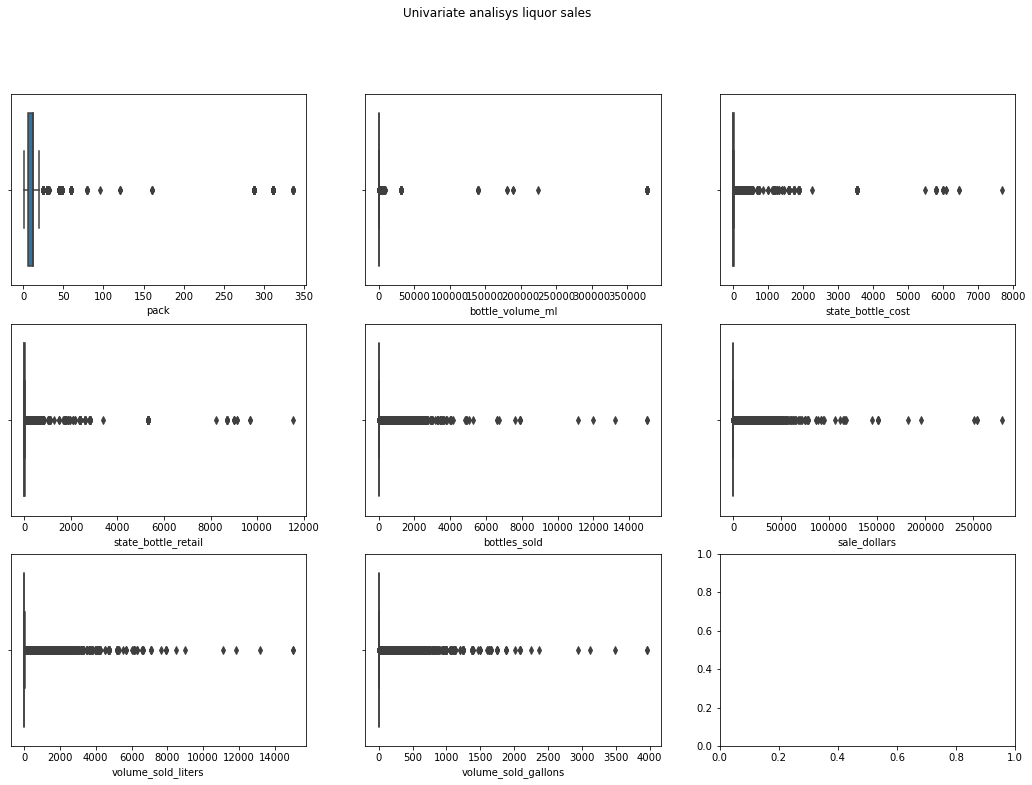

In [175]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Univariate analisys liquor sales')

sns.boxplot(ax=axes[0, 0], data=df_filled, x='pack')
sns.boxplot(ax=axes[0, 1], data=df_filled, x='bottle_volume_ml')
sns.boxplot(ax=axes[0, 2], data=df_filled, x='state_bottle_cost')
sns.boxplot(ax=axes[1, 0], data=df_filled, x='state_bottle_retail')
sns.boxplot(ax=axes[1, 1], data=df_filled, x='bottles_sold')
sns.boxplot(ax=axes[1, 2], data=df_filled, x='sale_dollars')
sns.boxplot(ax=axes[2, 0], data=df_filled, x='volume_sold_liters')
sns.boxplot(ax=axes[2, 1], data=df_filled, x='volume_sold_gallons')

Data has some outliers, but its possible and this can be valid values. 

In [176]:
for column in ['pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
               'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons']:
    print(column+':', df_filled[column].skew())

pack: 3.207053860522872
bottle_volume_ml: 229.9250279172752
state_bottle_cost: 225.80996035374073
state_bottle_retail: 225.82016057046675
bottles_sold: 59.621721335510415
sale_dollars: 81.51738957353342
volume_sold_liters: 60.45622478588976
volume_sold_gallons: 60.454912954927345


Most of the variables have a pronounced asymmetry.

<h2><ul><li><strong>Univariate analysis</strong></li></ul></h2>

 Lets check 99 quantile and drop some outrange values to build histograms and boxplots.

In [177]:
df_analysis = df_filled[(df_filled['sale_dollars'] > df_filled['sale_dollars'].quantile(0.01))\
                        &(df_filled['sale_dollars'] < df_filled['sale_dollars'].quantile(0.99))&\
                        (df_filled['bottle_volume_ml'] > df_filled['bottle_volume_ml'].quantile(0.01))\
                        &(df_filled['bottle_volume_ml'] < df_filled['bottle_volume_ml'].quantile(0.99))&\
                        (df_filled['state_bottle_cost'] > df_filled['state_bottle_cost'].quantile(0.01))\
                        &(df_filled['state_bottle_cost'] < df_filled['state_bottle_cost'].quantile(0.99))]

<AxesSubplot:xlabel='volume_sold_gallons'>

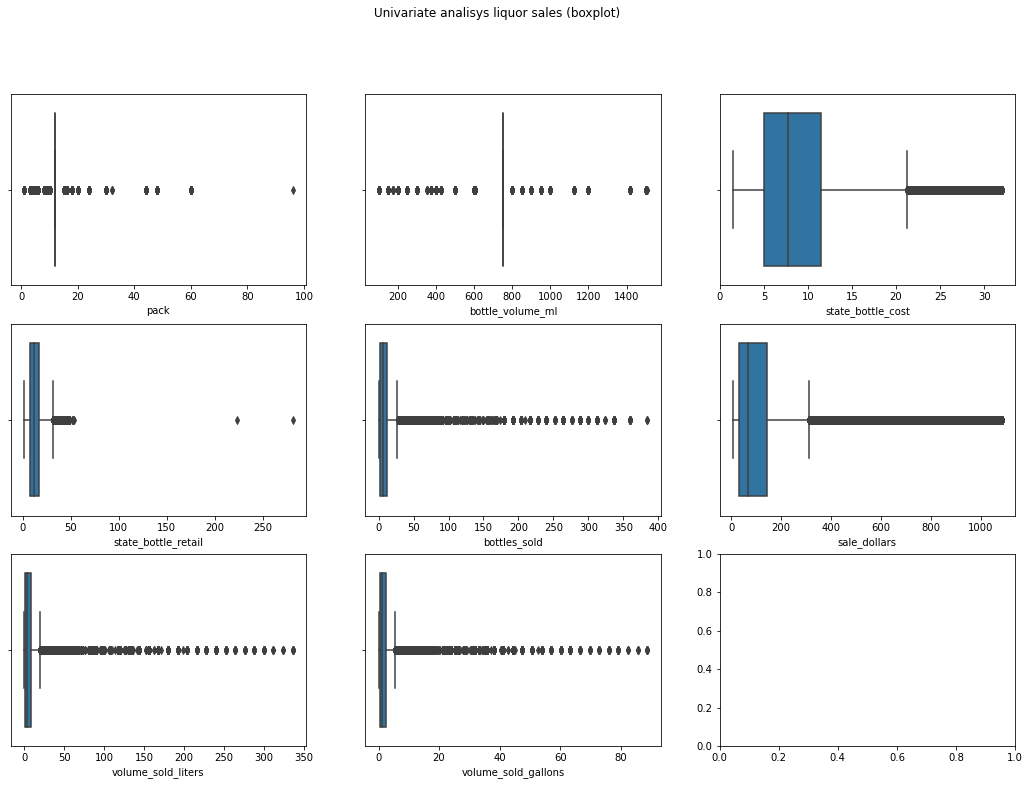

In [178]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Univariate analisys liquor sales (boxplot)')

sns.boxplot(ax=axes[0, 0], data=df_analysis, x='pack')
sns.boxplot(ax=axes[0, 1], data=df_analysis, x='bottle_volume_ml')
sns.boxplot(ax=axes[0, 2], data=df_analysis, x='state_bottle_cost')
sns.boxplot(ax=axes[1, 0], data=df_analysis, x='state_bottle_retail')
sns.boxplot(ax=axes[1, 1], data=df_analysis, x='bottles_sold')
sns.boxplot(ax=axes[1, 2], data=df_analysis, x='sale_dollars')
sns.boxplot(ax=axes[2, 0], data=df_analysis, x='volume_sold_liters')
sns.boxplot(ax=axes[2, 1], data=df_analysis, x='volume_sold_gallons')

We can see some otliers in state_bottle_cost. Fix it.

In [179]:
df_filled.loc[df_filled['invoice_and_item_number'] == 'INV-22865900004', 'state_bottle_retail'] = 15
df_filled.loc[df_filled['invoice_and_item_number'] == 'INV-22918500001', 'state_bottle_retail'] = 15
df_analysis.loc[df_analysis['invoice_and_item_number'] == 'INV-22865900004', 'state_bottle_retail'] = 15
df_analysis.loc[df_analysis['invoice_and_item_number'] == 'INV-22918500001', 'state_bottle_retail'] = 15

In [180]:
df_filled = df_filled.reset_index(drop=True)

Lets check distribution of variables.

<AxesSubplot:>

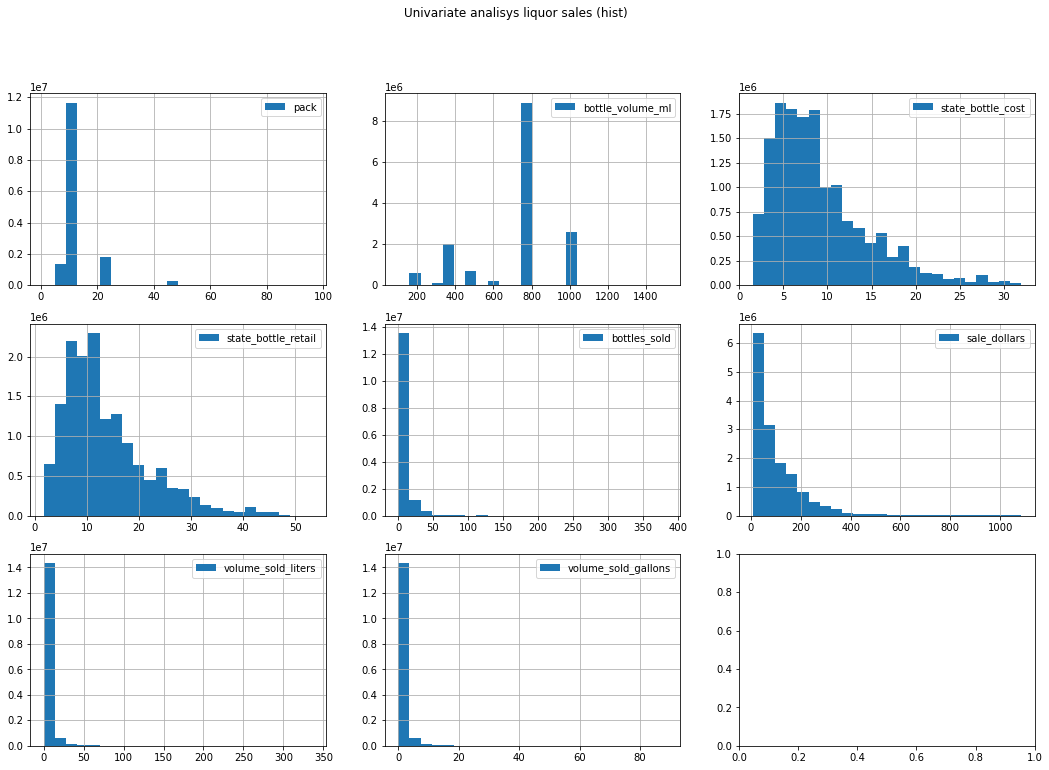

In [181]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Univariate analisys liquor sales (hist)')

df_analysis['pack'].hist(ax=axes[0, 0], bins=24, legend=True)
df_analysis['bottle_volume_ml'].hist(ax=axes[0, 1], bins=24, legend=True)
df_analysis['state_bottle_cost'].hist(ax=axes[0, 2], bins=24, legend=True)
df_analysis['state_bottle_retail'].hist(ax=axes[1, 0], bins=24, legend=True)
df_analysis['bottles_sold'].hist(ax=axes[1, 1], bins=24, legend=True)
df_analysis['sale_dollars'].hist(ax=axes[1, 2], bins=24, legend=True)
df_analysis['volume_sold_liters'].hist(ax=axes[2, 0], bins=24, legend=True)
df_analysis['volume_sold_gallons'].hist(ax=axes[2, 1], bins=24, legend=True)

As we can see most distributions are skewed distributions with a cutoff on the left or gamma distributions. It differs from everyone only bottle_volume_ml distribution.

<h2><ul><li><strong>Bivariate analysis</strong></li></ul></h2>

Lets create some new columns.  

In [182]:
df_aggregate = df_filled.copy()
df_aggregate['sale_dollars'] = df_aggregate['state_bottle_retail'] * df_aggregate['bottles_sold']
df_aggregate['volume_sold_liters'] = df_aggregate['bottle_volume_ml']/1000 * df_aggregate['bottles_sold']
df_aggregate['Year'] = df_aggregate['date'].apply(lambda x: x.year)
df_aggregate['Month'] = df_aggregate['date'].apply(lambda x: x.month)
df_aggregate['Weekday'] = df_aggregate['date'].apply(lambda x: x.strftime("%A"))
df_aggregate['store'] = df_aggregate['store_number'] + '|' + df_aggregate['store_name']
df_aggregate['profit'] = df_aggregate['sale_dollars'] - \
                                            (df_aggregate['state_bottle_cost'] * df_aggregate['bottles_sold']) 

In [183]:
df_aggregate = df_aggregate[['date', 'Year', 'Month', 'Weekday', 'store', 'store_location_W', 'store_location_N',
                             'city', 'zip_code', 'county_number','county', 'category_name', 'vendor_name',
                             'item_description', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
                             'bottles_sold', 'volume_sold_liters', 'sale_dollars', 'profit']]

In [184]:
df_aggregate.head()

,date,Year,Month,Weekday,store,store_location_W,store_location_N,city,zip_code,county_number,county,category_name,vendor_name,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,sale_dollars,profit
0,2017-02-03,2017,2,Friday,3443|Super Saver Iv,-95.837,41.271,Council Bluffs,51503,78,Pottawattamie,Flavored Rum,PERNOD RICARD USA,Malibu Coconut Rum,1750.000,16.490,24.740,6.000,10.500,148.440,49.500
1,2020-11-30,2020,11,Monday,5869|Tobacco Outlet Plus #507 - Urbandale,-93.712,41.629,Urbandale,50322,77,Polk,Flavored Rum,BACARDI USA INC,Bacardi Limon,1750.000,15.000,22.500,6.000,10.500,135.000,45.000
2,2019-01-22,2019,1,Tuesday,5326|Als Liquor,-95.202,42.647,Storm Lake,50588,11,Buena Vista,Flavored Rum,BACARDI USA INC,Bacardi Limon,1750.000,15.000,22.500,6.000,10.500,135.000,45.000
3,2020-08-05,2020,8,Wednesday,3443|Super Saver Iv,-95.837,41.271,Council Bluffs,51503,78,Pottawattamie,Flavored Rum,PERNOD RICARD USA,Malibu Coconut Rum,1750.000,16.990,25.490,6.000,10.500,152.940,51.000
4,2019-07-17,2019,7,Wednesday,4239|Fareway Stores #850 / Spirit Lake,-95.106,43.422,Spirit Lake,51360,30,Dickinson,Flavored Rum,PERNOD RICARD USA,Malibu Coconut Rum,1750.000,16.990,25.490,6.000,10.500,152.940,51.000


<AxesSubplot:>

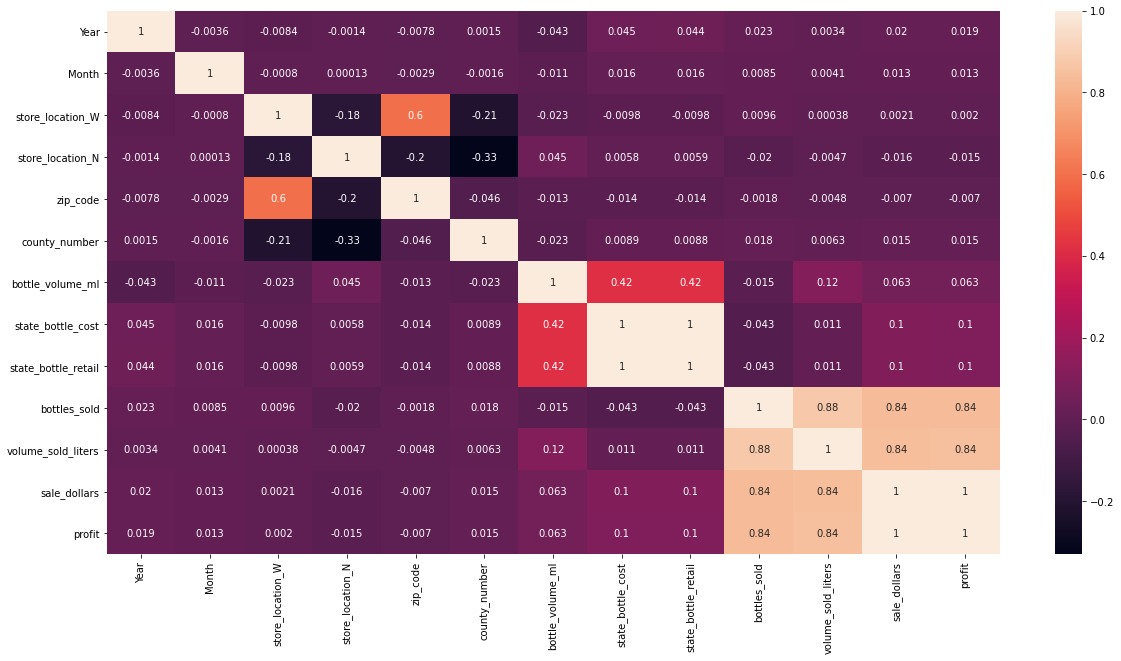

In [185]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_aggregate.corr(), annot=True)

As we can see zip_code and county numeric values have a little bit correlation with location, bottle volume has some logic correlation with bottle cost, and of course the biggest correlation beatween sold liters and sale dollars.

<h2><ul><li><strong>Multivariate analysis</strong></li></ul></h2>

<h3><em>a)Bar diagramms in aggregation summarize sales in dollars and sold liters</em></h3>

In [233]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_bar(fig, df_aggregate, column, i, j):
    '''Plot Bar'''
    
    df_plot = df_aggregate.groupby(column).agg({'sale_dollars': 'sum', 'volume_sold_liters': 'sum'}).\
                                        sort_values(by='sale_dollars', ascending=False).reset_index().head(10)
    fig.add_traces([
        go.Bar(name='Sale in dollars',x=df_plot[column], y=df_plot['sale_dollars']),
        go.Bar(name='Volume in litres',x=df_plot[column], y=df_plot['volume_sold_liters'])
    ], rows=i, cols=j)
    return fig

<ul><li><em>Store and City</em></li></ul>

In [229]:
fig = make_subplots(rows=1, cols=2)
fig = plot_bar(fig, df_aggregate, 'store', 1, 1)
fig = plot_bar(fig, df_aggregate, 'city', 1, 2)
fig.update_layout(autosize=False, width=950, height=400)
fig.show()

In [231]:
# Conclusions

<ul><li><em>County and Category</em></li></ul>

In [235]:
fig = make_subplots(rows=1, cols=2)
fig = plot_bar(fig, df_aggregate, 'county', 1, 1)
fig = plot_bar(fig, df_aggregate, 'category_name', 1, 2)
fig.update_layout(autosize=False, width=950, height=400)
fig.show()

In [236]:
# Conclusions

<ul><li><em>Vendor and Item</em></li></ul>

In [238]:
fig = make_subplots(rows=1, cols=2)
fig = plot_bar(fig, df_aggregate, 'vendor_name', 1, 1)
fig = plot_bar(fig, df_aggregate, 'item_description', 1, 2)
fig.update_layout(autosize=False, width=950, height=400)
fig.show()

In [237]:
# Conclusions

<h3><em>b)Describe the typical bottle that was sold</em></h3>

In [264]:
df_analysis['store'] = df_analysis['store_number'] + '|' + df_analysis['store_name']
df_analysis['bottle_volume_l'] = df_analysis['bottle_volume_ml'] / 1000

def plot_bar(fig, df_analysis, column, i, j):
    '''Plot Bar'''
    
    df_plot = df_analysis.groupby(column).agg({'state_bottle_cost': 'mean', 'bottle_volume_l': 'mean', 'date': 'count'}).\
                                        rename(columns={'state_bottle_cost': 'avg_state_bottle_cost',
                                                        'bottle_volume_l': 'avg_bottle_volume_l'}).\
                                        query('date > 1000').\
                                        sort_values(by='avg_state_bottle_cost', ascending=False).reset_index().head(10)
    fig.add_traces([
        go.Bar(name='Average bottle cost',x=df_plot[column], y=df_plot['avg_state_bottle_cost']),
        go.Bar(name='Average bottle volume(litres)',x=df_plot[column], y=df_plot['avg_bottle_volume_l'])
    ], rows=i, cols=j)
    return fig

In [265]:
fig = make_subplots(rows=1, cols=3)
fig = plot_bar(fig, df_analysis, 'item_description', 1, 1)
fig = plot_bar(fig, df_analysis, 'city', 1, 2)
fig = plot_bar(fig, df_analysis, 'county', 1, 3)
fig.update_layout(autosize=False, width=950, height=600)
fig.show()

In [ ]:
df_analysis[(df_analysis['item_description']>30)&(df_analysis['item_description']<32)]